# **Assignment 11**
This exercise has two parts:

- Part A consists of mandatory exercises; you need to complete these and hand in your answers to be able to partake in the exam. This part also provides you with an impression of the minimum knowledge level necessary to pass the exam.
- Part B consists of additional exercises. These repeat a concept that is covered in Part A or help to broaden or deepen your understanding of some of the topics.

## Assignment by
Lan Stare, s1169977

Aaron Ritz, s1170346

Group: 42

## Advised Reading and Exercise Material
**The following reading material is recommended:**
Read and study sections 6.1, 6.3, 6.7, 6.8 and 6.10 of chapter 6 of TSK.


## Introduction
This week you will learn more about classifiers! For this exercise-set, we focus on Random Forests and Neural Networks in particular. These are models that are still very actively used to solve classification problems! We start you off with some brief theory exercises, to make sure you understand both models well (enough) to use them later.

# **Part A** - Mandatory Exercises
Below you will find the mandatory exercises for Week 11 of the course Data Mining and Machine Learning.

# Exercise 1 - Random Forrest
A random forest is trained by building many decision trees, each on a bootstrapped sample of the training data (sampling rows with replacement). At every split inside each tree, the algorithm randomly selects a subset of features (max_features) and chooses the best split only among those, which decorrelates the trees. By averaging the predictions of all these diverse trees, voting for classification or averaging for regression, the forest drastically reduces variance while keeping bias low. 

**Helpful hints:**
- Have a look at the accompanying reader for some insights into Random Forrest and Bootstrapping!

**(a)** Explain how the value of ```max_features``` changes the behavior and performance of the random forest. What happens if this value is small? What happens if this value is large?

**(b)** Explain how the value of ```max_depth``` affects the behavior and performance of the random forest. What happens if this value is small? What happens if this value is large?

ANSWERS:

__(a)__ If we add a max_features parameter we can: firstly, reduce the complexity because we don't need to check all of the attributes, and secondly, decrese the similarity between trees making the ensamble method better since our diversity is higher. If the parameter is small, the trees are all very far from the true one. This is similar to having no expertice in a subject. If the parameter is too big, the trees all become more similar since the same attributes need to be used in most of the trees.

__(b)__ The parameter max_depth helps us reduce overfitting and complexity since we force our individual trees to stop before getting too deep (even if they are not pure). If this value is small, our trees stop growing a lot before they should which causes large errors due to underfitting. If this value is too large, the tree can keep splitting even when it starts modelling the noise. This is known as overfitting.

## Exercise 2 - Neural Networks
Below, we ask a few questions about Neural Networks. Neural Networks classify training samples $X$ by passing the parameters of $X$ through into it's network at the input layer, then having it cascade through the network, to finally end up at the output layer. You can probably guess that the input layer then has the same shape as a sample $X$, and the output the same shape as the set of possible labels $y$, but how does the rest work? If you already know, great! If you don't, Well... You should have a look at the accompanying reader for the basics on how Neural Networks work!

### 2.1 Broken Network
A student writes this code:
```
X = np.array([[1, 2], [3, 4]])  # 2 samples, 2 features
w1 = np.random.rand(2, 3)       
w2 = np.random.rand(2, 1)       # 1 output

hidden = sigmoid(X @ w1)
output = sigmoid(hidden @ w2)   # ERROR!
```

What's wrong? What should the shape of `w2` be and why?


ANSWER:

It needs to be a matrix of size 3 x 1. Because w1 is the size of 2 x 3, the hidden is also of that size so we cannot concatenate the hidden matrix withw2 if w2 is not of size 3 x 1 (the 1 in this matters only because we want to get an output).

### 2.2 Hidden layers
Why can this network solve XOR, but a single neuron cannot?
```
Input (2) → Hidden (2) → Output (1)
```

**Helpful hints:**
- This question might be covered in the reader :)

ANSWER:

A single neuron can only learn linear relationships between features and the output. In contrast, a multilayer network can learn non-linear problems because it acts as a composite of linear layers with non-linear activation functions.

### 2.3 Activation Functions
  a. What is the purpose of the activation function? What would happen if we only used linear transformations? Would the network from 2.2 without activation functions be able to solve XOR?

  b. Which output-layer activation function would you recommend for a network that outputs probabilities, i.e., outputs $\in [0, 1]$? Why?

  c. What happens to the output of a sigmoid when it gets very low or high input values? Could you foresee problems when a network has many layers with sigmoid activations in between?

ANSWERS:

__(a)__ The activation function transforms input data to avoid linearity. If the activation function was only a linear transformation, we could only move the linear boundary and not change its shape causing the final linear boundary to only be linear. The network from 2.2 would not be able to solve the XOR problem without an activation function because there is no way to draw a linear line to separate two classes.

__(b)__ I would recommend the Sigmoid function because it's a continuous function and only squashes the input values to a range between 0 and 1, which is exactly what we want if we are interested in probabilities.

__(c)__ As we approach extreme values, the gradients become very small which causes slower learning. This means that if a network has many layers with sigmoid activations, our computation could get very expensive.

### 2.4 MSE vs Cross-Entropy For Classification
Mean Squared Error measures "distance" while Cross-Entropy measures "information difference". What does this mean intuitively?
Consider: Your spam filter makes these predictions on emails that are actually spam (y=1):

Email A: Prediction = 0.55
Email b: Prediction = 0.01

Calculate the MSE and CE loss for both. Which loss function punishes overconfident wrong predictions (Email B) more severely, and why does this matter for training reliable classifiers?

ANSWER:

The MSE measures how wrong the predictions are whereas the CE focuses on having the most predictions correct.


Calculations:

$MSE_a = {(1 - 0.55)}^2 = 0.20$

$MSE_b = {(1 - 0.01)}^2 = 0.0001$

$CE_a = -\log(0.55) = 0.26$

$CE_b = -\log(0.01) = 2.0$

MSE punishes overconfident wrong predictions more severely which means that in the next iteration the weight would adjust so the extremely wrong predictions were classified correctly. This means that even a small amount of elements could sway the final vote which could potential result in wrong predictions due to noise.

## **Exercise 3** - Introduction to Neural Networks in PyTorch

To easily program neural networks, we can make use of the Torch library, which does all the heavy lifting for us: automatic-differentation, backpropagation, gradient computation, optimization, and efficient tensor operations on both CPUs and GPUs.
We'll get started with the basics, and then later you will program your very own neural network to approximate a continuous function on a compact domain: 
$$f(x) = \frac{1}{2}sin(3x)$$

Read the tutorial page on Torch's website: https://docs.pytorch.org/tutorials/beginner/basics/intro.html.

**Helpful hints:**
- Have a look at the accompanying reader for some other insights into these topics!

In [18]:
import torch
from torch import nn

# Use a GPU if available to allow for acceleration.
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else 'cpu'

# Mock some training data with some noise added
n_train = 100
X_train = torch.linspace(0, 2 * torch.pi, n_train, device=device).unsqueeze(1)
y_train = 0.5 * torch.sin(3 * X_train) + 0.001 * torch.randn(n_train, 1, device=device)

# Mock some test data
n_test = 1000
X_test = (torch.rand(n_test, device=device) * 2 * torch.pi).unsqueeze(1)
y_test = 0.5 * torch.sin(3 * X_test)

**a.** Plot the training data. Hint: you might want to use the ```.numpy()```, or ```.squeeze()``` method on your training data.

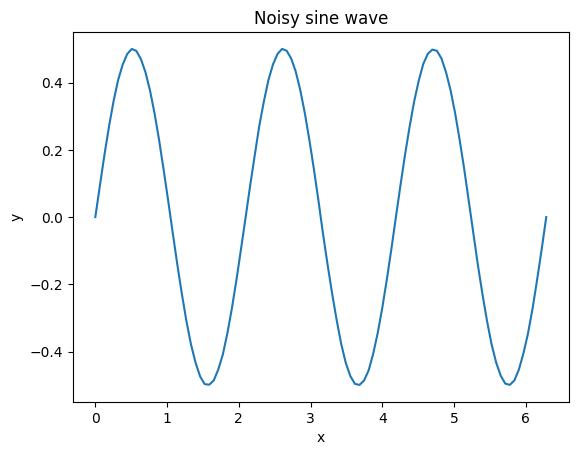

In [19]:
import matplotlib.pyplot as plt

plt.plot(X_train.squeeze(1), y_train.squeeze(1))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy sine wave')
plt.show()

**b.** Now, it is time to build a neural network that will approximate the data. We will provide you with most of the code, but it is left to you to implement the forward method in the neural network. Hint: look at the documentation again to get a sense of what the forward method does and how you can go about implementing it, given the layers and activation functions in the ```__init__```.

Epoch 0: loss = 0.160033
Epoch 300: loss = 0.099753
Epoch 600: loss = 0.099739
Epoch 900: loss = 0.099728
Epoch 1200: loss = 0.099719
Epoch 1500: loss = 0.099716


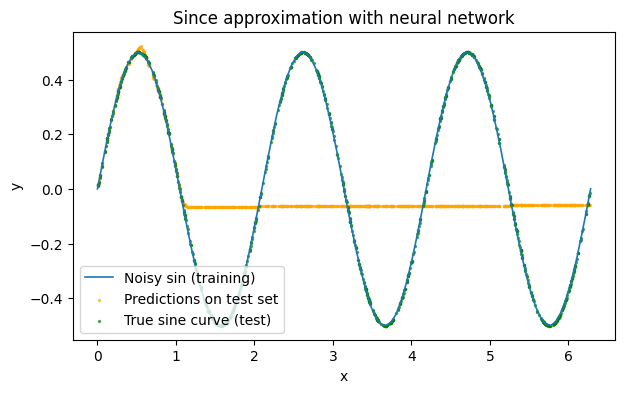

In [20]:
class NeuralNetwork(nn.Module):
    def __init__(self):     #we're first building the network
        super().__init__()
        
        self.fc1 = nn.Linear(1, 32)     #in layer 1 we're takin in 1 layer and outpitting 32 numbers into second layer
        self.fc2 = nn.Linear(32, 32)    #first hidden layer
        self.fc3 = nn.Linear(32, 1) #creates 1 output from 32 values which is our prediction of sine approx
        self.act = nn.ReLU()    #we're using ReLu activation

    def forward(self, x):       #describing how to compute the prediction
        x = self.act(self.fc1(x))       #we're running the x through the first layer which changes the shape of x from (n x 1) to (n x 32) then we still apply ReLu actuvation
        x = self.act(self.fc2(x))   #running the (n x 32) x through the first hidden layer
        x = self.fc3(x)     #passing through the last layer (there's no activation here bc we want x to be any real value)
        return x
    
model = NeuralNetwork().to(device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()
epochs = 1500


for epoch in range(epochs + 1):
    optimizer.zero_grad()
    pred = model(X_train)
    loss = loss_fn(pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 300 == 0:
        print(f'Epoch {epoch}: loss = {loss.item():.6f}')


with torch.no_grad():
    y_pred = model(X_test)


plt.figure(figsize=(7, 4))
plt.title('Since approximation with neural network')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_train.cpu().squeeze(), y_train.cpu().squeeze(), linewidth=1.2, label='Noisy sin (training)')
plt.scatter(X_test.cpu().squeeze(), y_pred.cpu().squeeze(), s=2, alpha=0.6, color='orange', label='Predictions on test set')
plt.scatter(X_test.cpu().squeeze(), y_test.cpu().squeeze(), s=2, alpha=0.6, color='green', label='True sine curve (test)')
plt.legend()
plt.show()

## **Exercise 4** - An appetizer for the project
### Comparing Random Forrest and Neural Networks
In the coming weeks, you will be working on the project. Here, you can show what you have learned in the course Data Mining & Machine Learning.
In this exercises, you will be thrown into the deep; you will do model selection for two 'baseline' models of your choice (i.e., logistic regression, random forest, support vector machine, Naive Bayes, KNN, etc.) and a neural network that you will program yourself.
Furthermore, you will decide upon the question whether or not all the extra machinery and the overhead that comes with it when using neural networks was appropriate, or if a baseline model would have sufficed.

The dataset you will be working on is a dataset from Kaggle about fitness data; it contains features such as age, height, weight, heart rate, blood pressure, etc. With these features, it is your task to predict whether or not an individual is fit (class 1) or not fit (class 0). For more information about this dataset, consult https://www.kaggle.com/datasets/muhammedderric/fitness-classification-dataset-synthetic?.

**Helpful hints:**
- The last section of the reader contains way more details on how to get Neural Networks working on a complex problem than we have so far presented. This could prove useful...

In [21]:
import pandas as pd
import kagglehub
import glob
import os

# Download latest version
path = kagglehub.dataset_download("muhammedderric/fitness-classification-dataset-synthetic")

# Find and load CSV
csv_file = glob.glob(os.path.join(path, '**', '*.csv'), recursive=True)[0]
dataset = pd.read_csv(csv_file)
print(dataset)

n_features = len(dataset.columns) - 1

      age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0      56        152         65        69.6           117.0          NaN   
1      69        186         95        60.8           114.8          7.5   
2      46        192        103        61.4           116.4          NaN   
3      32        189         83        60.2           130.1          7.0   
4      60        175         99        58.1           115.8          8.0   
...   ...        ...        ...         ...             ...          ...   
1995   52        173         98        60.7           106.1          NaN   
1996   61        186         74        51.4           123.8          9.4   
1997   77        198         89        76.7           103.6          8.3   
1998   62        190         63        80.7           115.9          6.7   
1999   51        166         78        89.3           101.8          8.3   

      nutrition_quality  activity_index smokes gender  is_fit  
0                  2.37

**a.** This dataset is one step closer to what you would encounter in the real world as a data scientist: there are missing values, class imbalance, and non-numerical feature values that might still be useful, but need transforming. Lastly, there are outliers in the dataset that will influence training. For more caveats, we refer once again to the Kaggle page and the heading **Data Quality Issues** specifically. Clean and process the dataset to your liking.

In [22]:
from sklearn.impute import SimpleImputer
import numpy as np


# Prepruning

#handling mixed data types (in smokes):
smokes_column = dataset.iloc[:, 8].values

for i in range(len(smokes_column)):
    if smokes_column[i] == "yes":
        smokes_column[i] = 1
    elif smokes_column[i] == "no":
        smokes_column[i] = 0
    else:
        continue
dataset.iloc[:, 8] = smokes_column

#convert gender strings to integers:
gender_column = dataset.iloc[:, 9].values
for i in range(len(gender_column)):
    if i == "M":
        gender_column[i] = 0
    elif i == "F":
        gender_column[i] = 1
    else:       #let's be inclusive although I doubt this dataset is
        gender_column[i] = 2

dataset.iloc[:, 9] = gender_column

#dealing with missing values(in sleep_hours):
sleep_hours_column = dataset.iloc[:, 5].values.reshape(-1, 1)   #fit_trasform takes arrays so we need to reshape the column

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_sleep_hrs = imputer.fit_transform(sleep_hours_column)

dataset.iloc[:, 5] = np.round(imputed_sleep_hrs, 1)     #I'm rounding the elements to 1 decimal like the other values already are
print(imputed_sleep_hrs)


[[7.51331522]
 [7.5       ]
 [7.51331522]
 ...
 [8.3       ]
 [6.7       ]
 [8.3       ]]


**b.** Find the cross-validated accuracy using a random forest. Hint: if you struggle to do this exercise, consult the reader. There, you will find step-by-step explanations and demonstrations on how to perform cross-validation with sklearn - or in case of neural networks, a custom implementation is provided.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]
print(X)


# cross-validation accuracy with random forest
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
tree = DecisionTreeClassifier(random_state=0)
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=30, random_state=0)
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=0)

# Train
tree.fit(Xf_train, yf_train)
bag.fit(Xf_train, yf_train)
rf.fit(Xf_train, yf_train)

# Evaluate
for name, m in {"Decision Tree": tree, "Bagging": bag, "Random Forest": rf}.items():
    pred = m.predict(Xf_test)
    print(f"{name}: test accuracy = {accuracy_score(yf_test, pred):.3f}")
    
    #10-fold cross validation:
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(m, X, y, cv=kf, scoring='accuracy')
    print(f'Generalization accuracy: {scores.mean()}')
    print(f'Generalization accuracy standard deviation: {scores.std()}')
    

      age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0      56        152         65        69.6           117.0          7.5   
1      69        186         95        60.8           114.8          7.5   
2      46        192        103        61.4           116.4          7.5   
3      32        189         83        60.2           130.1          7.0   
4      60        175         99        58.1           115.8          8.0   
...   ...        ...        ...         ...             ...          ...   
1995   52        173         98        60.7           106.1          7.5   
1996   61        186         74        51.4           123.8          9.4   
1997   77        198         89        76.7           103.6          8.3   
1998   62        190         63        80.7           115.9          6.7   
1999   51        166         78        89.3           101.8          8.3   

      nutrition_quality  activity_index smokes gender  
0                  2.37        

**c.** Find the cross-validated accuracy using a second baseline model.

In [24]:
# cross-validation accuracy using logistic regression

from sklearn.linear_model import LogisticRegression

Xl_train, Xl_test, yl_train, yl_test = train_test_split(dataset.iloc[:,:-1], dataset.iloc[:, -1], test_size=0.2, random_state=42)

logreg = LogisticRegression(random_state=42, max_iter=2000)
logreg.fit(Xl_train, yl_train)

yl_pred = logreg.predict(Xl_test)
print(f"Logistic Regression: test accuracy = {accuracy_score(yl_test, yl_pred):.3f}")

#10-fold cross validation:
kl = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(logreg, X, y, cv=kl, scoring='accuracy')
print(f'Generalization accuracy: {scores.mean()}')
print(f'Generalization accuracy standard deviation: {scores.std()}')

Logistic Regression: test accuracy = 0.760
Generalization accuracy: 0.7765000000000001
Generalization accuracy standard deviation: 0.03138869223143901


**d.** Implement a neural network using Torch and try to beat the baseline models in terms of cross-validated accuracy. Report the cross-validated accuracy of your neural network.

In [28]:
# cross-validation accuracy using Neural Network

from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn

#we're first converting the data into np and change the strings into integers:
Xn, yn = dataset.drop(columns=['is_fit']).to_numpy(dtype=np.float32), dataset['is_fit'].to_numpy(dtype=np.float32)

#now we need to come up with our custom network:
class CustomNet(nn.Module):
    def __init__(self, n_feats):     #we're first building the network
        super().__init__()
        
        self.fc1 = nn.Linear(n_feats, 32)     #in layer 1 we're takin in 1 layer and outpitting 32 numbers into second layer
        self.fc2 = nn.Linear(32, 32)    #first hidden layer
        self.fc3 = nn.Linear(32, 1) #creates 1 output from 32 values which is our prediction of sine approx
        self.act = nn.ReLU()    #we're using ReLu activation

    def forward(self, x):       #describing how to compute the prediction
        x = self.act(self.fc1(x))       #we're running the x through the first layer which changes the shape of x from (n x 1) to (n x 32) then we still apply ReLu actuvation
        x = self.act(self.fc2(x))   #running the (n x 32) x through the first hidden layer
        x = self.fc3(x)     #passing through the last layer (there's no activation here bc we want x to be any real value)
        return x

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else 'cpu'

n_folds = 10
kn = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
train_epochs = 1000

average_accuracy = []
for fold, (train_idx, val_idx) in enumerate(kn.split(Xn, yn)):
    Xn_train, Xn_test = torch.tensor(Xn[train_idx], dtype=torch.float32, device=device), torch.tensor(Xn[val_idx], dtype=torch.float32, device=device)
    yn_train, yn_test = torch.tensor(yn[train_idx], dtype=torch.float32, device=device), yn[val_idx]

    model = CustomNet(n_features).to(device=device)
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(train_epochs):
        optimizer.zero_grad()
        pred = model(Xn_train)
        loss = loss_fn(pred.squeeze(1), yn_train)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        logits = model(Xn_test)
        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).long()

    average_accuracy.append(accuracy_score(yn_test, preds.cpu()))

average_accuracy = np.array(average_accuracy)
print(f'Generalization accuracy: {average_accuracy.mean()}')
print(f'Generalization accuracy standard deviation: {average_accuracy.std()}')

Generalization accuracy: 0.783
Generalization accuracy standard deviation: 0.024000000000000004


**e.** Write a very brief evaluation of what you did. 
* Which models did you use
* What was the performance of these models
* How confident are you about this performance? Why?
* Which model would you recommend if you had to deploy a classifier for this problem? E.g. consider:
  - performance
  - simplicity
  - interpretability
  - scalability
  - energy consumption and compute

ANSWERS:

For this short project I used Random Forest, logistic regression and Neural Network classifier. I went for logistic regression because it's commonly used for binary classification problems.

The accuracy of the random forest classifier is 0.768 with standard deviation of 0.029.
The accuracy of logistic regression is 0.777 with standard deviation of 0.031
The accuracy of the neural network classifier is 0.783 with standard deviation of 0.024.

The Neural network did outperform other two classifiers since it has both the highest accuracy and the lowest standard deviation, which means it is also the most trustworthy. Because we have 2000 examples, the complexity is not a big problem yet. Which means we can go for the best performing classifier. If we had more data, the neural network classifier would become too slow.

It is also the most complicated classifier to understand and implement so the next best choice, the logistic regression, would maybe come in handy. It also has quite a good performance and the standard deviation does not differ much from the other two classifiers. Also if complexity was a problem, the logistic regression would be the preferred option. The downside, however, is that it cannot handle missing data so we had to preprune the inputs because of it which resulted in a slightly worse accuracy due to imputing.

# **Part B**

## **Exercise 5** - Out Of Bag error
A Random Forest classifier is trained on a dataset with 1,000 samples. For each tree, a bootstrap sample of 800 samples is drawn with replacement.

Answer the following questions:
  - Approximately how many samples are not included in the bootstrap sample for a single tree?
  - Why we can use these out-of-bag samples to estimate error, without need for a seperate validation set?

## **Exercise 6** - The theory of the Vanishing Gradient Problem

In this exercise, we dive deeper into the vanishing gradient problem. In order to do so, we must understand why this problem arises, why it is a problem at all in the first place, and how we can overcome it. Beware that subquestions occur during the text as well so read everything thoroughly!

### A formal description of a feed-forward neural network
A neural network is a function $f_\theta:\mathbb{R}^{n_0}\to\mathbb{R}^{n_L}$ parameterized by weights and biases $\theta=\{(W^{(l)}, b^{(l)})\}_{l=1}^L$, where $n_0$ is the dimension of the input, $n_L$ is the number of outputs of the network, and $L$ is the number of layers. More generally, $n_l$ is the number of nodes in layer $l$.

For each layer $l=1,\ldots, L$, we define $z^{(l)} := W^{(l)}a^{(l-1)} + b^{(l)}$, and $a^{(l)} := \sigma^{(l)}(z^{(l)})$. Put simply, each $z^{(l)}$ is just a vector for layer $l$ where each entry is a linear combination of the activations in the previous layer - plus some bias term - and each $a^{(l)}$ is the vector where we applied the activation function $\sigma^{(l)}$ component wise to the vector $z^{(l)}$.
For convenience, we let $a^{(0)} = x$, where $x$ is the input to the model. Then, we can write
$$
f_\theta(x) = \left(\sigma^{(L)} \circ A^{(L)} \circ \ldots \circ \sigma^{(1)} \circ A^{(1)} \right)(x),
$$
where $A^{(l)}(x) := W^{(l)} x + b^{(l)}$.

**a.** It is easy to get lost in the notation, so let's zoom in a bit on the shapes of some elements. We know that $W^{(l)} \in \mathbb{R}^{n_l \times n_{l-1}}$. Now, for the bias term $b^{(l)}$, what is its dimension? I.e., for what $d$ does it hold that $b^{(l)}\in\mathbb{R}^d$?

### Training the network
In order to train the network, we have to decide upon a loss function. Then, as you have seen earlier in class, you can use gradient descent to train the network. Let's denote our loss function as $\mathcal{L}:\mathbb{R}^{n_L \times n_L} \to \mathbb{R}_{\geq 0}$. Then, by the gradient descent update rule we get
$$
W^{(l)} = W^{(l)} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial W^{(l)}} \tag{0} \\
$$
and
$$
b^{(l)} = b^{(l)} - \alpha \frac{\partial \mathcal{L}}{\partial b^{(l)}}
$$

For models like linear regression or logistic regression, it is rather easy to work out the partial derivative, but now, it is not so straightforward. How to tackle this problem will be discussed in the next section.

### Backpropagation
In this section, we will see how we obtain the partial derivatives discussed earlier and with that the recipe to train a neural network is complete!
First off, we will focus on just the partial derivative $\frac{\partial \mathcal{L}}{\partial W^{(l)}}$, since we can just extend the weight matrix $W^{(l)}$ with an extra column for the bias parameters. Note, however, that the neural network then will get an extra node in each layer that has a constant value of 1.

**b.** Now that we extended the matrices $W^{(l)}$ with an extra column for the bias parameters, what are its new dimensions? I.e., for what $d$ does it hold that $W^{(l)}\in\mathbb{R}^{n_l \times d}$ ?

To compute the partial derivative, we break it up in smaller pieces; instead of taking the derivative all at once with respect to $W^{(l)}$, we will consider the partial derivative with respect to each of its entries: $\frac{\partial \mathcal{L}}{\partial w_{ij}^{(l)}}$, where $w_{ij}^{(l)}$ is the element in $W^{(l)}$ at row $i$ and column $j$.

Let's dive into the calculation:
$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w_{ij}^{(l)}} &= \frac{\partial \mathcal{L}}{\partial z_i^{(l)}} \cdot \frac{\partial z_i^{(l)}}{\partial w_{ij}^{(l)}} \\
&= \delta_i^{(l)} \cdot \frac{\partial}{\partial w_{ij}^{(l)}} \sum_{j=1}^{n_{l-1} + 1} w_{ij}^{(l)} a_j^{(l-1)} \\
&= \delta_i^{(l)} \cdot a_j^{(l-1)}, \\
\end{aligned}
$$
where we defined $\delta_i^{(l)} := \frac{\partial \mathcal{L}}{\partial z_i^{(l)}}$.

Now the problem has been reduced to finding these $\delta_i^{(l)}$. There are two cases:
1. $l = L$:
Then, the calculation $\delta_i^{(L)} = \frac{\partial \mathcal{L}}{\partial z_i^{(L)}}$ depends entirely on the loss function chosen. To illustrate, we will do this calculation for the loss function $\mathcal{L}(\hat{y}, y) = \frac{1}{2} \sum_{i=1}^{n_L} (\hat{y}_i - y_i)^2$. Then,
$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial z_i^{(L)}} &= \frac{\partial}{\partial z_i^{(L)}} \cdot \frac{1}{2} \sum_{i=1}^{n_L} \left(\sigma^{(l)}(z_i^{(L)}) - y_i\right)^2\\
&= \left(\sigma^{(L)}(z_i^{(L)}) - y_i\right) \cdot \left(\sigma^{(L)}\right)'(z_i^{(L)}) \\
&=(a_i^{(L)}-y_i)\cdot \left(\sigma^{(L)}\right)'(z_i^{(L)}) =: \delta_i^{(L)} \\
\end{aligned}
$$
2. $l < L$:
Then, we can do a calculation for any loss function:
$$
\begin{aligned}
\delta_i^{(l)} &= \frac{\partial\mathcal{L}}{\partial z_i^{(l)}} \\
&= \frac{\partial \mathcal{L}}{\partial a_i^{(l)}} \cdot \frac{\partial a_i^{(l)}}{\partial z_i^{(l)}} \\
&= \frac{\partial \mathcal{L}}{\partial a_i^{(l)}} \cdot \left(\sigma^{(l)}\right)'(z_i^{(l)}) \\
&= \left(\sigma^{(l)}\right)'(z_i^{(l)}) \cdot \sum_{j=1}^{n_{l+1}} \frac{\partial \mathcal{L}}{\partial z_j^{(l+1)}} \cdot \frac{\partial z_j^{(l+1)}}{\partial a_i^{(l)}} \\
&= \left(\sigma^{(l)}\right)'(z_i^{(l)}) \cdot \sum_{j=1}^{n_{l+1}} \delta_j^{(l+1)} \cdot w_{ji}^{(l+1)}.
\end{aligned}
$$
Or, re-expressed in vectorized form ($\odot$ for element-wise multiplication):
$$
\delta^{(l)} = \left(\left(W^{(l+1)}\right)^T \delta^{(l+1)}\right) \odot (\sigma^{(l)})'(z^{(l)}) \tag{1} \\
$$
and consequently,
$$
\frac{\partial \mathcal{L}}{\partial W^{(l)}} = \delta^{(l)} \left(a^{(l-1)}\right)^T \tag{2}\\
$$

Now, the problem lies in the choice of the activation functions $\delta^{(l)}$. We will demonstrate where the problem lies for the sigmoid activation function.

**c.** The sigmoid activation function is given by $\delta(x) = \frac{1}{1 + \exp(-x)}$. Prove that $\sigma'(x)=\sigma(x)\left(1-\sigma(x)\right)$.
**d.** Prove that $\sigma'(x) \leq \frac{1}{4}$ for all values of $x$. Hint: find the maximizer of the function $f(t) = t(1-t)$.

Taking norms in equation (1), we find the following bound using the triangle inequality:
$$
\begin{aligned}
\|\delta^{(l)}\| &= \left\| \left(\left(W^{(l+1)}\right)^T \delta^{(l+1)}\right) \odot (\sigma^{(l)})'(z^{(l)}) \right\| \\
&\le \left\| \left(W^{(l+1)}\right)^T \right\| \, \left\| \delta^{(l+1)} \right\| \left\|(\sigma^{(l)})'(z^{(l)}) \right\|_{\infty} \\
&\le \left\| \left(W^{(l+1)}\right)^T \right\| \, \left\| \delta^{(l+1)} \right\| \cdot \frac{1}{4} \\
&\ldots \\
&\le \left(\prod_{k=l}^{L-1} \|(W^{(k+1)})^T\|\right)\left(\frac{1}{4}\right)^{L-1} \|\delta^{(L)}\|\\
&\lesssim \left(\frac{1}{4}\right)^{L-1} \|\delta^{(L)}\| \tag{3} \\
\end{aligned}
$$

**d.** Using (3), compute $\lim_{l\to\infty}\|\delta^{(l)}\|$. Hint: you can bound the norm above with (3) and then use the fact that norms are positive to conclude your answer.

Now, using (2), we can find the following bound:
$$
\begin{aligned}
\left\|\frac{\partial\mathcal{L}}{\partial W^{(l)}}\right\| &= \left\|\delta^{(l)} \left(a^{(l-1)}\right)^T\right\| \\
&\le \left\|\delta^{(l)}\right\|\left\|\left(a^{(l-1)}\right)\right\| \\
&\le \left\|\delta^{(l)}\right\| \left\|\left(a^{(l-1)}\right)\right\|_{\infty} \\
&\le \left\|\delta^{(l)}\right\| \tag{4}\\
\end{aligned}
$$
**e.** Using (d) and (4), show that $\lim_{l\to\infty}\left\|\frac{\partial\mathcal{L}}{\partial W^{(l)}}\right\| = 0$. Hint: you can bound the norm above with (4) and then use the fact that norms are positive to conclude your answer.

As you just computed, $\lim_{l\to\infty}\left\|\frac{\partial\mathcal{L}}{\partial W^{(l)}}\right\| = 0$. 

**f.** Now looking back at equation (0), explain why it is problematic for training the neural network that $\lim_{l\to\infty}\left\|\frac{\partial\mathcal{L}}{\partial W^{(l)}}\right\| = 0$. Hint: in order to make progress with gradient descent, we have to keep updating, but what if our updates are of super small size?

This phenomenon you just explored is called the vanishing gradient problem. The sigmoid is not the only activation function that suffers from this problem. To be more precise, every activation function that saturates (meaning that their derivatives get really small asymptotically) suffers from the vanishing gradient problem, and even for activation function that don't saturate, the vanishing gradient problem remains when we use a large amount of layers.

**g.** Explain why the ReLU activation function doesn't suffer from the vanishing gradient problem as much.

# Handing in
Hand in the filled-in notebook:
- Make sure your names and student-numbers are mentioned at the appropriate location at the top of this file.
- Make sure you wrote a serious attempt for all exercises in part A
- Make sure the notebook is named groupnumber_assignment10.ipynb

When you are confident all of this is correctly done, one of you can hand in the exercises in Brightspace!